# Predicting Spam Emails 

**Group Members: Xinyi Wang, Emma Wolfe, Elena Leung, Qiyu Luo**

**Course: STAT_V 301 102 2024W2 Statistical Modelling for Data Science**

**Date: Tuesday, April 8th 2025**

# Introduction 

## Background Information 

## Question we are adressing: 

We want to examine the association between spam emails (response) and predictors that describe the email content (count or presence of certain words) and general information about the email (count of attachments, subject content, character count). For specific variables used in the model refer to the following list: 

- `spam`: target variable
- `to_multiple`: indicates if the email was sent to more than one recipient (dbl -binary)
- `from`: if message was listed from someone (dbl - binary)
- `cc`: number of people who were cc'd (dbl - positive integer)
- `sent_email`: indicates if the sender had been sent an email in the last 30 days (dbl - binary)
- `image`: number of images attached (dbl - positive integer)
- `attach`: number of attached files (dbl - positive integer)
- `dollar`: number of times a dollar sign or the word dollar appears in the email (dbl - positive integer)
- `winner`: indicates if the word "winner" apears in the email (chr - binary but as "yes" or "no")
- `inherit`: number of times the word inherit (or others like inheritance) appear in the email (dbl - positive integer)
- `viagra`: the number of times viagra appears in the email (dbl - positive integer)
- `password`: the number of times password appears in the email (dbl - positive integer)
- `num_char`: the number of characters in the email (dbl - in thousands)
- `line_breaks`: the number of line breaks in the email (does not count text wrapping)
- `format`: indicates whether the email was written using HTML (may have bold letters or links)
- `re_subj`: the subjects starts with “Re:”, “RE:”, “re:”, or “rE:”
- `exclaim_subj`: indicates if there is an exclamation point in the subject
- `urgent_subj`: indicates if the word urgent is in the email subject
- `exclaim_mess`: the number of exclamation points in the email message (double
- `number`: indicates if there was no number, a small number (under 1 million), or a big number (more than 1 million) (character - text)


# Methods and Results

## a) Data

In [6]:
#import statements 
library(tidyverse)
library(readr)
library(dplyr)
library(ggplot2)
library(patchwork)
library(boot)
library(caret)
library(pROC)

In [3]:
# read and load the dataset into R from the data folder 
data_link = "https://www.openintro.org/data/csv/email.csv"
email_data <- read_csv(data_link, show_col_types = FALSE)
head(email_data)

spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,⋯,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0,1,0,0,2012-01-01 06:16:41,0,0,0,no,⋯,0,0,11.370,202,1,0,0,0,0,big
0,0,1,0,0,2012-01-01 07:03:59,0,0,0,no,⋯,0,0,10.504,202,1,0,0,0,1,small
0,0,1,0,0,2012-01-01 16:00:32,0,0,4,no,⋯,0,0,7.773,192,1,0,0,0,6,small
0,0,1,0,0,2012-01-01 09:09:49,0,0,0,no,⋯,0,0,13.256,255,1,0,0,0,48,small
0,0,1,0,0,2012-01-01 10:00:01,0,0,0,no,⋯,0,2,1.231,29,0,0,0,0,1,none
0,0,1,0,0,2012-01-01 10:04:46,0,0,0,no,⋯,0,2,1.091,25,0,0,0,0,1,none


**Citation for data:** Diez, D. (2012). *email* \[Dataset]. OpenIntro. https://www.openintro.org/data/index.php?data=email


**Observational or Experimental data:** Observational data since it is just data collected from a single inbox of an individual user. There was no manipulation of variables to study cause and effect. 


**Description of variables:**

| Variable Name | Type| Description|
| :--------------| :----:| :------------|
|spam | Categorical | An indicator of whether the email is spam or not. |
|to_multiple| Categorical| An indicator for whether the email was addressed to more than one person.|
|from | Categorical| An indicator for whether the email was listed as from anyone.|
|cc | Numerical | How many people were included in the CC list. |
|sent_email| Categorical| An indicator for whether the sender had been contacted via email in the last 30 days.|
|time| String| When the email was sent.|
|image| Numerical | The number of images attached.|
|attach|Numerical| The number of attachments included.|
|dollar| Numerical| The number of times the word ``dollar`` was used or ``$`` appeared. |
|winner| Categorical| Whether or not the word ``winner`` appeared in the email.|
|inherit| Numerical| The number of times the word ``inherit`` appeared.|
|viagra| Numerical| The number of times the word ``viagra`` appeared.|
|password| Numerical| The number of times the word ``password`` appeared.|
|num_char| Numerical | The number of characters in the emails (by the thousands).|
|line_breaks| Numerical| The number of line breaks excluding text wrapping.| 
|format| Categorical| An indicator for whether the email was written using HTML.|
|re_subj| Categorical| Whether the subject line lead with some variation of ``RE:`` (in all variations of casing).|
|exclaim_subj| Categorical| Whether the subject line contains `!`.|
|urgent_subj| Categorical| Whether the subject line contains `urgent`.|
|exclaim_mess| Numerical |The number of `!` contained in email body.|
|number| Categorical| An indicator for whether no numbers appeared, a number < $10^7$ appeared, or a large number $\ge 10^7$ appeared.|


spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,⋯,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
<fct>,<fct>,<fct>,<dbl>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
0,0,1,0,0,2012-01-01 06:16:41,0,0,0,no,⋯,0,0,11.370,202,1,0,0,0,0,big
0,0,1,0,0,2012-01-01 07:03:59,0,0,0,no,⋯,0,0,10.504,202,1,0,0,0,1,small
0,0,1,0,0,2012-01-01 16:00:32,0,0,4,no,⋯,0,0,7.773,192,1,0,0,0,6,small
0,0,1,0,0,2012-01-01 09:09:49,0,0,0,no,⋯,0,0,13.256,255,1,0,0,0,48,small
0,0,1,0,0,2012-01-01 10:00:01,0,0,0,no,⋯,0,2,1.231,29,0,0,0,0,1,none
0,0,1,0,0,2012-01-01 10:04:46,0,0,0,no,⋯,0,2,1.091,25,0,0,0,0,1,none


## Exploratory Data Analysis (EDA)

In [8]:
# Transforming data: factoring the data for tidying
# Main developer: Elena
# Contributors: 
email_tidy <- email_data |>
                mutate(
                    spam = as.factor(spam),
                    to_multiple = as.factor(to_multiple),
                    from = as.factor(from),
                    sent_email = as.factor(sent_email),
                    winner = as.factor(winner),
                    format = as.factor(format),
                    re_subj = as.factor(re_subj),
                    exclaim_subj = as.factor(exclaim_subj),
                    number = as.factor(number)
                )

head(email_tidy)

spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,⋯,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
<fct>,<fct>,<fct>,<dbl>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
0,0,1,0,0,2012-01-01 06:16:41,0,0,0,no,⋯,0,0,11.370,202,1,0,0,0,0,big
0,0,1,0,0,2012-01-01 07:03:59,0,0,0,no,⋯,0,0,10.504,202,1,0,0,0,1,small
0,0,1,0,0,2012-01-01 16:00:32,0,0,4,no,⋯,0,0,7.773,192,1,0,0,0,6,small
0,0,1,0,0,2012-01-01 09:09:49,0,0,0,no,⋯,0,0,13.256,255,1,0,0,0,48,small
0,0,1,0,0,2012-01-01 10:00:01,0,0,0,no,⋯,0,2,1.231,29,0,0,0,0,1,none
0,0,1,0,0,2012-01-01 10:04:46,0,0,0,no,⋯,0,2,1.091,25,0,0,0,0,1,none


In [10]:
# Checking if there is any NaN/missing values 
# FALSE if there are no NaN values 
# TRUE if there are missing values 
any(is.na(email_tidy))

[1] FALSE

In [12]:
# Checking class imbalance 
email_tidy %>% count(spam)

spam,n
<fct>,<int>
0,3554
1,367


In [13]:
# Checking counts of from variable to determine if it is useable 
email_data %>% count(from)

from,n
<dbl>,<int>
0,3
1,3918


We have decided to drop this variable because of the large class imbalance it will likely not positively contribute to the model. 

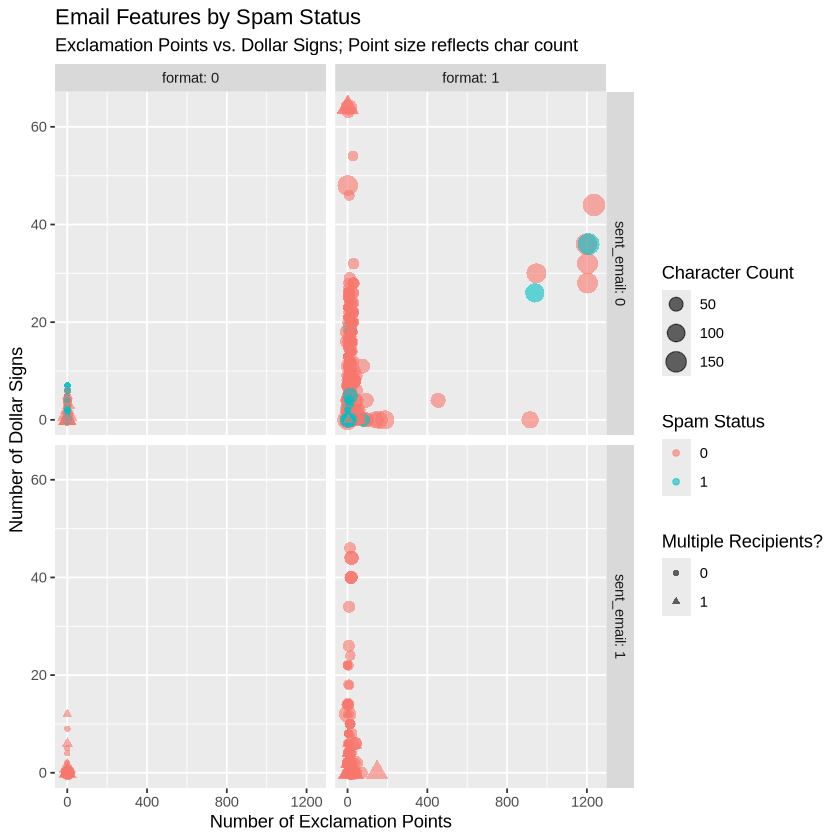

In [9]:
# Plot for EDA
# Main developer: Qiyu
# Contributors: 

ggplot(email_tidy, aes(
  x = exclaim_mess,
  y = dollar,
  color = spam,
  shape = to_multiple,
  size  = num_char
)) +
  geom_point(alpha = 0.6) +
  facet_grid(sent_email ~ format, labeller = label_both) +
  labs(
    title    = "Email Features by Spam Status",
    subtitle = "Exclamation Points vs. Dollar Signs; Point size reflects char count",
    x        = "Number of Exclamation Points",
    y        = "Number of Dollar Signs",
    color    = "Spam Status",
    shape    = "Multiple Recipients?",
    size     = "Character Count"
  )

In [ ]:
# ggpairs for correlation plot 

## Methods: Plan

Proposed Methof to address question: **Logistic Regression**

This method can be used to address the above question since the target is binary. Some of the variables of interest have been included in the question above to increase specificity and proper variable selection will be conducted in the final stage of this project. We are assuming the outcome is binary, that an email is either a regular email or a spam email, an email cannot be both a regular email and a spam. We are also assuming our sample is sufficient. While we are only using one user's inbox for this model, we can narrow our focus and question to be answered using just this one set of data. The model may perform poorly on other mailboxes. We are also assuming the relationship between the predictor variables and the log-odds of the target variable is linear when it is possible that is not the case. This is a potential limitation of the model since we might be trying to find a linear relationship where there isn't any or it is not as strong as another relationship. Logistic regression also may struggle with the class imbalance. We have an acceptable amount of spam emails to use but there is still an imbalance. It is possible this issue will not arise but it is something to keep in mind.

# Discussion

# References 

1. Diez, D. (2012). email [Dataset]. OpenIntro. https://www.openintro.org/data/index.php?data=email